In [62]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import normalize

mat_content = sio.loadmat( 'face(1).mat' )

face_data = mat_content[ 'X' ]

face_data_labels = mat_content[ 'l' ]

print( 'Face Data Shape: {}'.format( face_data.shape ) )
print( 'Face Data Labels Shape: {}'.format( face_data_labels.shape ) )

faceDataLabeled = np.vstack( ( face_data, face_data_labels ) )

print( 'Face Data Labeled Shape: {}'.format( faceDataLabeled.shape ) )

Face Data Shape: (2576, 520)
Face Data Labels Shape: (1, 520)
Face Data Labeled Shape: (2577, 520)


In [32]:
#Randomized Train test Split 42
train_label, test_label = train_test_split( faceDataLabeled.T, test_size = 0.3, random_state = 42 )
#Stratified Train test Split
# train_label, test_label = train_test_split( face_data.T, stratify = face_data_labels, test_size= 0.2 )

train_label = train_label.T.astype( 'float64' )
test_label  = test_label.T.astype( 'float64' )

print( 'Shape of Train Set {}'.format( train_label.shape ) )
print( 'Shape of Test Set {}'.format( test_label.shape ) )

Shape of Train Set (2577, 364)
Shape of Test Set (2577, 156)


[574. 603. 596. ... 236. 228. 215.]
[143.5  150.75 149.   ...  59.    57.    53.75]


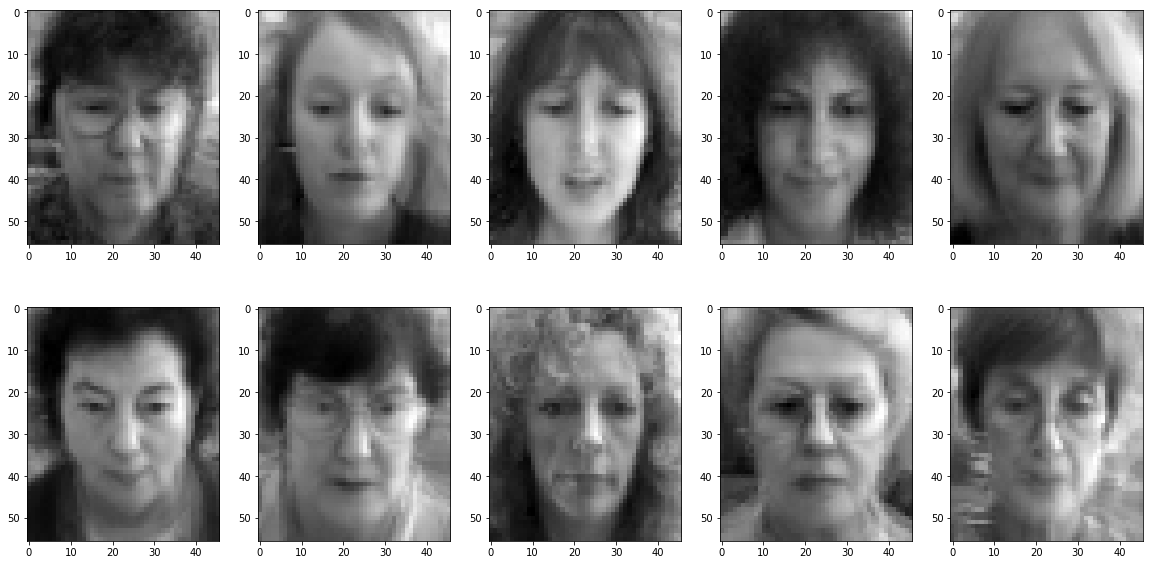

In [33]:
#Compute the Class Mean 
ClassMean = np.zeros((face_data.shape[0],52))
Num = np.zeros((52,1))
# print(ClassMean.shape)
# print(train_label.shape[1])
for i in range(train_label.shape[1]):
    ClassMean[:,train_label[2576,i].astype( 'int' )-1] = ClassMean[:,train_label[2576,i].astype( 'int' )-1] + train_label[: - 1,i]
    Num[train_label[2576,i].astype( 'int' )-1] = Num[train_label[2576,i].astype( 'int' )-1] + 1

print(ClassMean[:,1])

for i in range(ClassMean.shape[1]):
    ClassMean[:,i] = ClassMean[:,i] / Num[i]
 

print(ClassMean[:,1])

fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_face_img    = np.reshape( ClassMean[:,i], ( 46, 56 ) )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()
fig.savefig("Q2meanface.png")

(2576, 364)
(2576,)


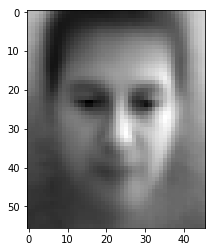

In [34]:
#Calculation of the mean face
print(train_label[: - 1].shape)
mean_face = np.mean( train_label[ : - 1 ], axis = 1) 
print(mean_face.shape)
mean_face_img = np.reshape(mean_face,(46,56))
plt.imshow( mean_face_img.T, cmap = 'gist_gray')

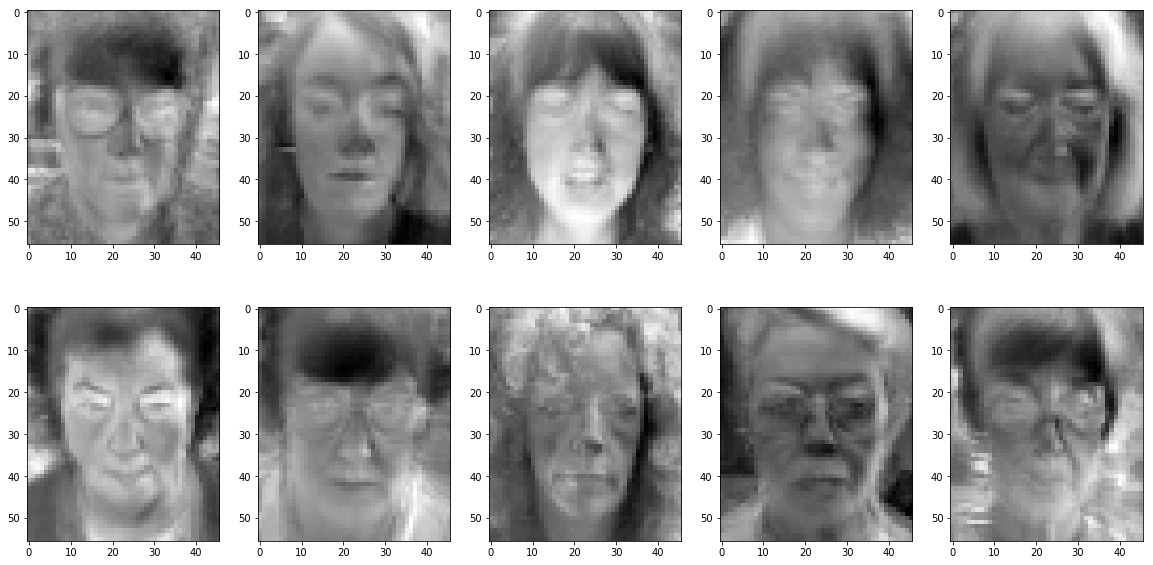

In [35]:
#Calculate Sb 
Sb = np.zeros((face_data.shape[0],52))
for i in range(Sb.shape[1]):
    Sb[:,i] = ClassMean[:,i] - mean_face
    
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_face_img    = np.reshape( Sb[:,i], ( 46, 56 ) )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()
fig.savefig("Q2meanface.png")

Sb = np.matmul(Sb,Sb.T)


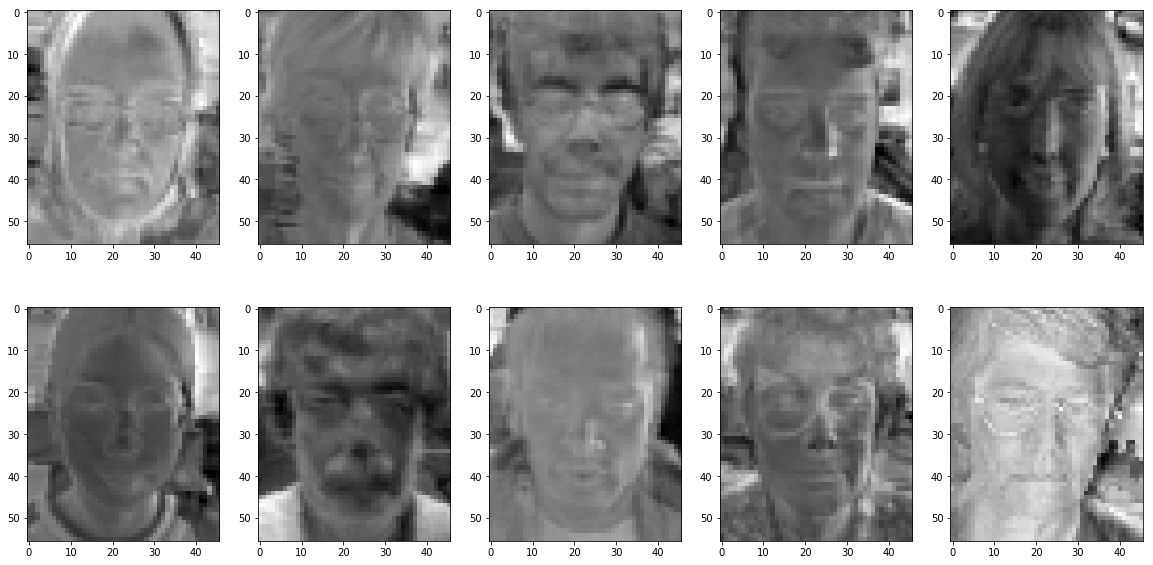

In [36]:
#Calculate Sw 
S = train_label
for i in range(S.shape[1]):
    S[: -1,i] = S[:-1,i] - ClassMean[:,S[-1 :,i].astype("int").item()-1]
    
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_face_img    = np.reshape( S[: -1,i], ( 46, 56 ) )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()
fig.savefig("Q2meanface.png")

#Compute the Sj
Sj = { k : [] for k in range( 1, 53 ) }
Num = np.zeros((52,1))

for i in range(S.shape[1]):
    Sj[S[2576,i].astype("int")].append(S[:,i])  
    Num[S[2576,i].astype("int")-1] = Num[S[2576,i].astype("int")-1] + 1

Sw = np.zeros((2576,2576))
for i in range(len(Sj)):
    
    cov = np.matmul(np.asarray(Sj[i+1])[:, : -1].T,np.asarray(Sj[i+1])[:, : -1])
    
    Sw = Sw + ( 1 / (Num[i]) ) * cov


# PCA

In [37]:
rank_sw = np.linalg.matrix_rank( Sw )

In [38]:
rank_sb = np.linalg.matrix_rank( Sb )

In [39]:
phi_mat = train_label[ : -1 ]

for i in range( phi_mat.shape[ 1 ] ):
    phi_mat.T[ i ] = phi_mat.T[ i ] - mean_face
    
print( 'Phi_Mat Shape {}'.format( phi_mat.shape ) )

Phi_Mat Shape (2576, 364)


In [40]:
A = phi_mat

S = 1 / A.shape[ 1 ] * np.dot( A, A.T )
print( 'Covariance Matrix Shape {}'.format( S.shape ) )

Covariance Matrix Shape (2576, 2576)


In [41]:
hd_eig_vals, hd_eig_vecs = np.linalg.eig( S )

In [42]:
hd_eig_pairs = [ ( np.abs( hd_eig_vals[ i ] ), hd_eig_vecs[ :, i ] ) for i in range( len( hd_eig_vals ) ) ]
hd_eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

for i in range( 10 ):
    print( hd_eig_pairs[ i ][ 0 ] )

22077381.908297196
365731.62815221946
277225.2118021998
128453.97705025855
108830.30173262647
87484.73375277771
71460.70022300283
57653.37856545091
49106.1179086545
44739.413369322334


In [148]:
# M = phi_mat.shape[ 1 ] # Take (Number Of Data Faces) M largest eigenvectors

M = 150

M_eig_vecs = []

for i in range( M ):
    M_eig_vecs.append( hd_eig_pairs[ i ][ 1 ] )
    
print( 'M Largest Eigen Pairs: {}'.format( len( M_eig_vecs ) ) )

M Largest Eigen Pairs: 150


In [149]:
M_eig_vecs = np.asarray( M_eig_vecs )

M_eig_vecs.shape

(150, 2576)

In [150]:
sbcalc = np.dot( M_eig_vecs, np.dot( Sb, M_eig_vecs.T ) )

sbcalc.shape

(150, 150)

In [152]:
swcalc = np.dot( M_eig_vecs, np.dot( Sw, M_eig_vecs.T ) )

swcalc.shape

(150, 150)

In [153]:
swinv = np.linalg.inv( swcalc )

swinv.shape

(150, 150)

In [154]:
something = np.dot( swinv, sbcalc )

In [155]:
lda_eig_val, lda_eig_vecs = np.linalg.eig( something )

In [156]:
lda_eig_vecs.shape

(150, 150)

In [157]:
M_lda = 30

lda_eig_pairs = [ ( np.abs( lda_eig_val[ i ] ), lda_eig_vecs[ :, i ] ) for i in range( len( lda_eig_val ) ) ]
lda_eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

M_lda_vecs = []

for i in range( M_lda ):
    print( lda_eig_pairs[ i ][ 0 ] )
    M_lda_vecs.append( lda_eig_pairs[ i ][ 1 ] )
    
    

11.011468573905058
8.505657217407178
5.08863038904384
3.880828889088225
3.5274844359619038
3.38339367715836
3.1796187586370754
3.0544028398344634
2.2797282880935
2.1518253879511007
2.127090565965198
2.0201959878573574
1.8343309185989278
1.6409289811486838
1.568653387593125
1.346992494005022
1.306468621392594
1.2119164041032828
1.160517604516637
1.042320510115235
0.9702673424810936
0.8991203676815616
0.8817784345291749
0.8065329686075658
0.7776562293276732
0.697763698773596
0.6790898880422024
0.6161843868126125
0.5959672174667592
0.5672632690405464


In [158]:
M_lda_vecs = np.asarray( M_lda_vecs )

M_lda_vecs
# M_eig_vecs

array([[-0.04735109+1.67426365e-34j, -0.00340547+1.75995993e-34j,
        -0.00321299+4.03109421e-38j, ...,  0.16186022+2.51476514e-33j,
        -0.14990345+4.92199880e-33j,  0.05306635+2.72025984e-33j],
       [-0.00696245+9.02296830e-35j,  0.00747064+6.31858112e-35j,
        -0.00491555+4.76789067e-34j, ...,  0.10465593-8.89715416e-33j,
        -0.05175471+4.19671285e-33j,  0.15541729-2.07579397e-33j],
       [ 0.00654973+2.61755410e-33j, -0.01056649+8.55335513e-34j,
        -0.01346196-3.75145195e-33j, ...,  0.11016837-6.51480408e-32j,
         0.04635712-1.67858565e-32j,  0.10001174-1.45331612e-32j],
       ...,
       [-0.02587018+1.46512011e-19j,  0.00268911-6.67684154e-20j,
        -0.0063682 -2.01666194e-20j, ..., -0.15129909+7.48715408e-19j,
        -0.09324006+7.04091941e-19j, -0.16291256-9.15998895e-19j],
       [ 0.00818186+3.53125408e-19j, -0.01619775+8.42870285e-20j,
         0.0002156 +4.76446389e-20j, ...,  0.018649  -2.95428075e-18j,
         0.10858773+1.90399434e-19j

In [159]:
wpcawlda = np.dot( M_lda_vecs.real, M_eig_vecs)

wpcawlda.shape

wpcawlda[ 0 ]

array([-0.03209948+0.j, -0.01361776+0.j,  0.00893519+0.j, ...,
        0.00365138+0.j,  0.03678357+0.j,  0.03593026+0.j])

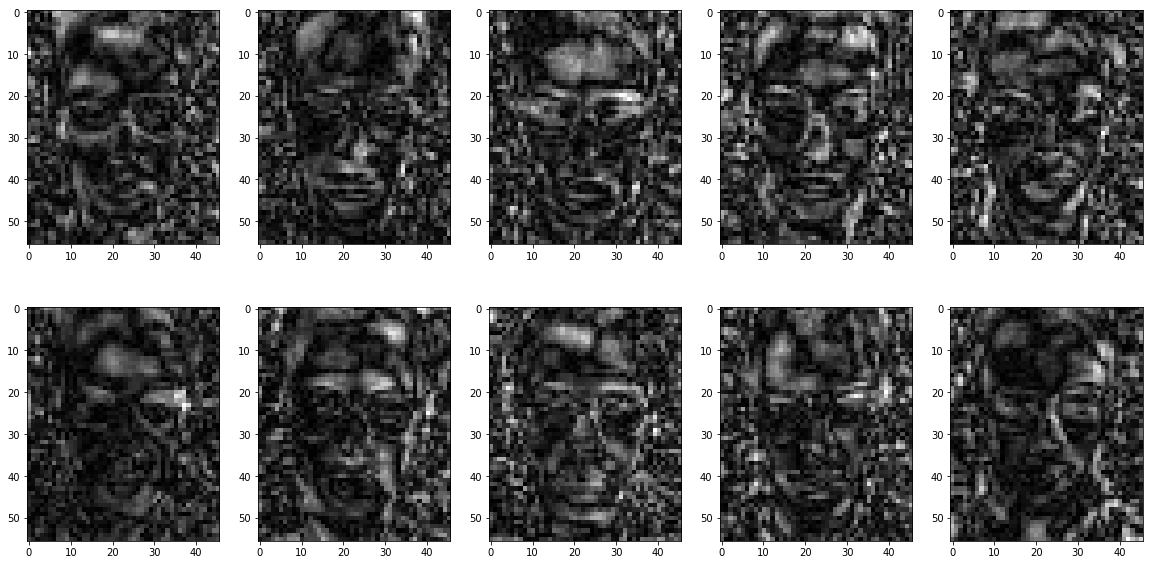

In [160]:
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    test_img = np.reshape(np.abs( wpcawlda[ i ].real ),(46,56))
    fig.add_subplot( 2, 5, i + 1 )
    plt.imshow( test_img.T, cmap = 'gist_gray')

In [161]:
wpcawlda.shape

(30, 2576)

In [162]:
training_data = train_label[ : -1 ]
training_label = train_label[ -1 : ]

training_data_projected = np.dot( wpcawlda.real, training_data )

training_label.shape

(1, 364)

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

X = training_data_projected.T
Y = training_label.reshape( training_label.shape[ 1 ] ).astype( 'int' )

KNN = KNeighborsClassifier(n_neighbors = 1)

KNN.fit( X, Y )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [164]:
testing_data  = test_label[ : - 1 ]
testing_label = test_label[ -1 : ] 

testing_data_projected = np.dot( wpcawlda, testing_data )

X_test = testing_data_projected.T
 
Y_test = testing_label.reshape( testing_label.shape[ 1 ] ).astype( 'int' )
Y_test_predicted = KNN.predict( X_test )

/home/aufar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


In [165]:
Accuracy = ( np.sum( Y_test_predicted == Y_test ) / Y_test.shape[ 0 ] * 100 )

print( 'Accuracy: {} %'.format( Accuracy ) )

Accuracy: 3.8461538461538463 %


In [147]:
Y_test

array([28, 10,  1, 17, 10, 52, 37, 23, 20, 49, 22, 19, 31, 51,  2, 39, 38,
        4, 50, 14, 16,  9, 12, 18, 33, 34,  8, 46, 51, 26, 25, 35, 34,  1,
       28,  7, 42, 21, 40, 31, 30, 35,  6, 52, 52, 16, 23, 26, 16, 18, 22,
       29,  8, 45, 35, 15, 45,  8,  1,  8, 41, 52, 49, 30,  7, 49, 29,  8,
       18,  4,  8,  8,  1,  2, 34,  3, 48, 50, 11,  9, 19, 15,  2, 36, 14,
       13, 11,  4, 48,  5, 32, 45, 37, 18, 29, 35, 14, 44, 46,  7, 36, 43,
       34, 23, 44, 44, 21, 34, 23, 51, 33, 19, 50, 36, 33, 20, 34, 50, 46,
       51,  9, 44,  8, 46,  2, 43, 19, 48,  2, 40,  6, 51, 35, 45, 41,  3,
       27,  5, 51, 28, 21, 29, 13, 42,  4, 12, 37, 30, 16,  6, 22,  3,  2,
       25,  7, 23])

In [71]:
Y_test_predicted

array([11, 24, 24,  9, 24, 33, 33, 22,  9, 30, 38, 24, 36, 22, 24, 33, 24,
       24, 33,  9,  9,  9, 24, 18, 12,  9, 24, 31,  9, 24,  9,  9,  9, 24,
       23, 24, 24, 24,  9, 36, 14, 41, 33, 33,  9, 24, 38, 24, 24,  9, 12,
        9, 24, 33, 33,  9,  9, 24, 24, 24, 22,  9, 33, 33, 24, 36, 33,  9,
        9, 24, 24, 24, 24, 18,  9, 38, 40, 50,  3, 33,  9, 11, 24, 44,  9,
       13, 31, 24, 47,  9, 33,  9, 33, 24, 24,  9, 24, 23, 12, 24, 33, 47,
       33,  9, 20, 22, 24,  9, 22, 31, 24, 11,  6, 24, 24,  9, 12,  9, 22,
       52,  9, 33,  9, 24, 36, 24,  9, 52, 22, 36, 24, 31, 30, 12, 41, 24,
       23, 33, 24, 33, 24, 22, 24,  5, 24, 24, 11, 14, 24, 24, 12,  9, 36,
       23, 24, 22])